In [30]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [31]:
df = pd.read_csv('heights2.csv')
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


<Axes: >

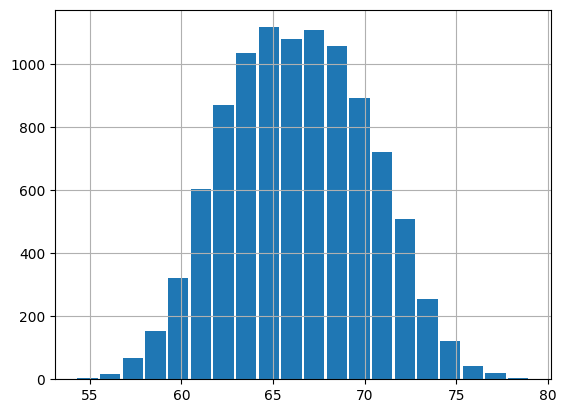

In [32]:
df['height'].hist(bins=20, rwidth=0.9)
# plt.hist(df['height'], bins=20, rwidth=0.8)

In [33]:
current_mean = df['height'].mean()
current_mean

66.367559754866

In [34]:
current_std = df['height'].std()
current_std

3.847528120795573

(1) Outlier detection and removal using 3 standard deviation

In [35]:
upper_limit_std = df['height'].mean() + 3 * df['height'].std()
upper_limit_std

77.91014411725271

In [36]:
lower_limit_std = df['height'].mean() - 3 * df['height'].std()
lower_limit_std

54.824975392479274

In [37]:
# outliers are greater than upper limit and less than lower limit

df[(df['height'] > upper_limit_std) | (df['height'] < lower_limit_std)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Cleaning the outliers

In [38]:
df_no_outlier_std = df[(df['height'] <= upper_limit_std) & (df['height'] >= lower_limit_std)]
df_no_outlier_std

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [41]:
df_no_outlier_std.shape

(9993, 2)

# Outlier removal using Z score

![](20240802143920.png)

In [45]:
# Calculating z-score for all features

df['zscore'] = (df['height'] - df['height'].mean()) / df['height'].std()
df

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [47]:
# In the context of z-score, an outlier value is greater than 3 and lesser than -3
df[df['zscore'] > 3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [48]:
df[df['zscore'] < -3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [52]:
all_z_score_outlier = df[(df.zscore > 3) | (df.zscore < -3)]
all_z_score_outlier

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [53]:
df_no_outlier_z_score = df[(df.zscore <= 3) & (df.zscore >= -3)]
df_no_outlier_z_score

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090
